# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Raffi Chaesa Ananda
- **Email:** raffi4244@gmail.com
- **ID Dicoding:** chaess

## Menentukan Pertanyaan Bisnis

- Kategori produk mana yang memiliki penjualan tertinggi dan terendah?
- Bagaimana distribusi geografis pelanggan berdasarkan kota?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
# from babel.numbers import format_currency
sns.set(style='dark')

## Data Wrangling

### Gathering Data

In [94]:
order_items_df = pd.read_csv("https://raw.githubusercontent.com/raffichs/submission/refs/heads/main/E-Commerce%20Public%20Dataset/order_items_dataset.csv")
# order_items_df.head()

products_df = pd.read_csv("https://raw.githubusercontent.com/raffichs/submission/refs/heads/main/E-Commerce%20Public%20Dataset/products_dataset.csv")
# products_df.head()

customers_df = pd.read_csv("https://raw.githubusercontent.com/raffichs/submission/refs/heads/main/E-Commerce%20Public%20Dataset/customers_dataset.csv")
# customers_df.head()

orders_df = pd.read_csv("https://raw.githubusercontent.com/raffichs/submission/refs/heads/main/E-Commerce%20Public%20Dataset/orders_dataset.csv")
# orders_df.head()

translate_df = pd.read_csv("https://raw.githubusercontent.com/raffichs/submission/refs/heads/main/E-Commerce%20Public%20Dataset/product_category_name_translation.csv")

**Insight:**
- Tabel pertama adalah *order_items*
- Tabel kedua adalah *products*
- Tabel ketiga adalah *customer*
- Tabel keempat adalah *orders*
- Tabel kelima adalah *translate* (hanya untuk translate nama produk)

### Assessing Data

In [ ]:
tables = [order_items_df, products_df, customers_df, orders_df]
# Uncomment salah satu untuk assessing table satu per satu
# tables = [order_items_df]
# tables = [products_df]
# tables = [customers_df]
# tables = [orders_df]

for table in tables:
  print("================")
  print(table.info())
  print("----------------")
  print(table.isna().sum())
  print("----------------")
  print("Jumlah data duplikasi:", table.duplicated().sum())
  print("----------------")
  print(table.describe())
  print("================")


**Insight:**
- Tabel *order_items* ada 1 masalah pada data type kolom *shipping_limit_date*
- Tabel *products* ada 1 masalah missing values pada beberapa kolom
- Tabel *customer* tidak ada masalah
- Tabel *orders* ada 2 masalah yaitu missing values dan data type

### Cleaning Data

In [ ]:
# Mengatasi masalah data type pada tabel order_items
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df.info()


# Mengatasi masalah missing values pada tabel products
products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0], inplace=True)

products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].mean(), inplace=True)
products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].mean(), inplace=True)
products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].mean(), inplace=True)

products_df.dropna(subset=['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], inplace=True)
products_df.isna().sum()


# Mengatasi masalah missing values dan data type pada tabel orders
# Missing values merupakan data kontinu (berdasarkan order_status), jadi saya tidak yakin metode apa yang harus digunakan dan akan saya tinggalkan
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])
orders_df.info()

**Insight:**
- *shipping_limit_date* dikonversi ke datetime64
- menghilangkan missing values dengan berbagai methode sesuai case
- konversi beberapa kolom menjadi datetime64

## Exploratory Data Analysis (EDA)

### Explore ...

In [108]:
# Eksplorasi data order_items dan products
orders_products_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
translated_products_df = pd.merge(
    left=orders_products_df,
    right=translate_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
translated_products_df.groupby(by="product_category_name_english").order_item_id.count().sort_values(ascending=False).head(10)
# translated_products_df.groupby(by="product_category_name_english").order_item_id.count().sort_values(ascending=True).head(10)

,order_item_id
product_category_name_english,
bed_bath_table,11115
health_beauty,9670
sports_leisure,8641
furniture_decor,8334
computers_accessories,7827
housewares,6964
watches_gifts,5991
telephony,4545
garden_tools,4347


In [ ]:
# Eksplorasi data customers dan orders
customers_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.groupby(by="customer_city").order_id.count().sort_values(ascending=False).head(15)

**Insight:**
- Data pada tabel *order_items* dan *products* menghasilkan kategori produk yang memiliki penjualan tertinggi dan terendah
- Data pada tabel *customers* dan *orders* menghasilkan distribusi geografis pelanggan berdasarkan kota

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-137-36c3672bf9d9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name_english", data=category_counts.head(5), palette=colors, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seabo

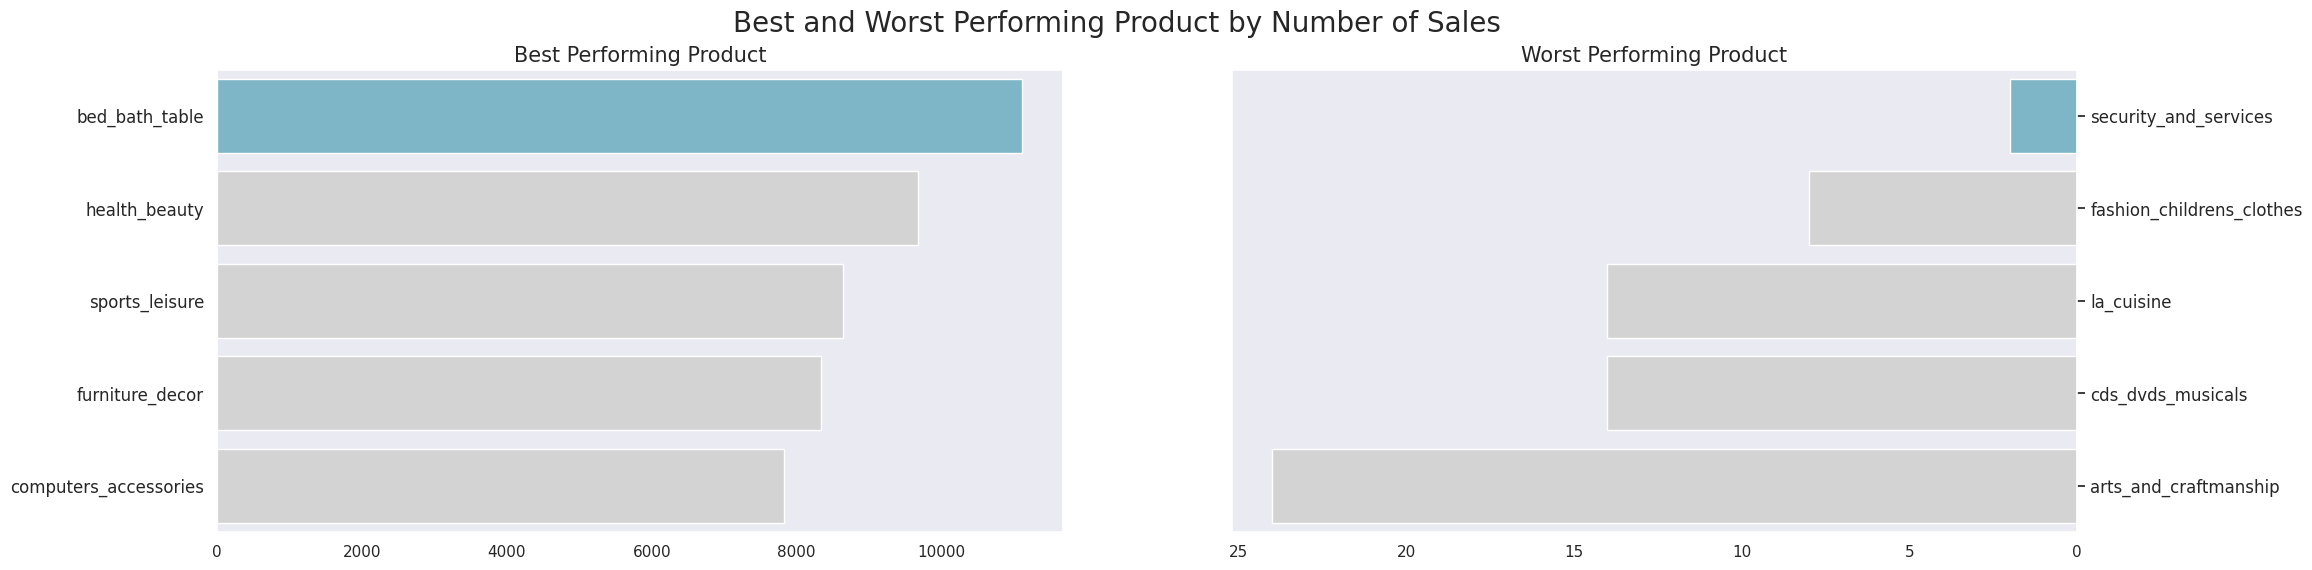

In [137]:
category_counts = translated_products_df.groupby(by="product_category_name_english").order_item_id.count().sort_values(ascending=False).reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_item_id", y="product_category_name_english", data=category_counts.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="order_item_id", y="product_category_name_english", data=category_counts.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

### Pertanyaan 2:

<ipython-input-136-a8965624fbb8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-136-a8965624fbb8>:9: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/loca

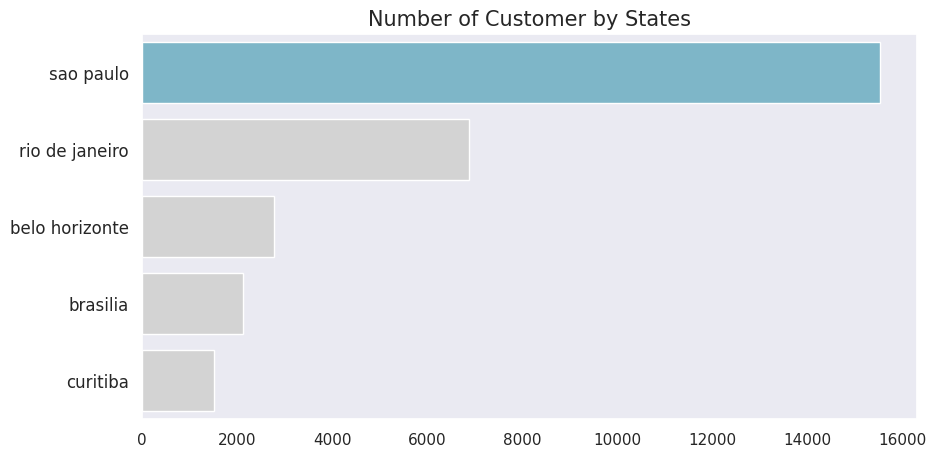

In [136]:
bycity_df = customers_orders_df.groupby(by="customer_city").agg(customer_count=("order_id", "count")).sort_values(by="customer_count", ascending=False).head(5).reset_index()
bycity_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bycity_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="customer_city",
    data=bycity_df,
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insight:**
- Visualisasi pertama menunjukkan jika *bed_bath_table* adalah kategori produk paling laris sedangkan *security_and_services* paling sedikit
- Visualisasi kedua menunjukkan persebaran demografis pembeli di 5 kota teratas

## Analisis Lanjutan (Opsional)

## Conclusion

- *bed-bath-table* adalah kategori produk paling laris disusul health, sports, dan furniture. Sedangkan security_and_services berada paling bawah. Berdasarkan data ini, beberapa produk unggulan bisa dipertahankan penjualannya. Beberapa produk yang masih kurang dan ada potensi bisa lebih digencarkan promosinya. Tidak perlu takut untuk unlisting produk yang tidak laku dan tidak ada potensi.  
- Sao Paulo, Ri de Janiero, Belo Horizonte, Brasilia, dan Curitiba adalah top 5 kota dengan customer paling banyak. Namun, gap penjualan kota Sao Paulo dengan kota di bawahnya masih sangat jauh. Mungkin itu bisa menjadi perhatian khusus dan lebih digencarkan lagi promosinya di kota-kota yang masih sepi.